# Приоритизация гипотез и анализ результатов A/B теста

## Вводная часть

В рамках проекта необходимо:
1. Выполнить приоритизацию 9-ти гипотез с использованием фреймворков ICE и RICE
2. Провести анализ результатов A/B теста.

## Приоритизация гипотез

### Подготовка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# загрузка данных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# переименование колонок для удобства
hypothesis.columns=['hypothesis',
                    'reach',
                    'impact',
                    'confidence',
                    'efforts']

In [4]:
pd.set_option('display.max_colwidth', 200)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В соответствии с описанием данных:
* hypothesis — краткое описание гипотезы;
* reach — охват пользователей по 10-балльной шкале;
* impact — влияние на пользователей по 10-балльной шкале;
* confidence — уверенность в гипотезе по 10-балльной шкале;
* efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Расчёт оценки по ICE

In [5]:
# Расчёт оценки в соответствии с фреймворком ICE
hypothesis['ice_score'] = (hypothesis['impact']
                           * hypothesis['confidence']
                           / hypothesis['efforts'])
hypothesis.sort_values(by='ice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


**Промежуточный вывод**: в соответствии с оценкой фреймворка ICE лидируют гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Расчёт оценки по RICE

In [6]:
# Расчёт оценки в соответствии с фреймворком RICE
hypothesis['rice_score'] = (hypothesis['reach']
                            * hypothesis['impact']
                            * hypothesis['confidence']
                            / hypothesis['efforts'])
hypothesis.sort_values(by='rice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Промежуточный вывод**: в соответствии с оценкой фреймворка RICE лидируют гипотезы:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Вывод по оценкам ICE и RICE

* Очевидно, что единственное отличие между методиками оценки по ICE и RICE в том, что последняя учитывает охват  пользователей.
* Несмотря на то, что по ICE лидировали гипотезы: "Запустить акцию, дающую скидку на товар в день рождения" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", они имели крайне низкие оценки охвата 1 и 3 соответственно: день рождения один раз в году, а новые каналы будут привлекать только на 30% больше пользователей.
* Таким образом, мероприятия по данным гипотезам могли "зацепить" сравнительно небольшое число пользователей, что и показала оценка по фреймворку RICE. Если рассматривать результаты оценки по последнему, то гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", хотя и уступает по оценке влияния, имеет максимальную оценку охвата, что позволило ей выбиться в лидеры.
* Гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" также попала в тройку лидеров за счёт высокой оценки по охвату пользователей и низкой оценке усилий (хотя при этом у неё низкая оценка воздействия).

## Анализ A/B-теста

### Подготовка данных

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
orders.columns = ['transaction_id',
                  'visitor_id',
                  'date',
                  'revenue',
                  'group']


display(orders.head())
display(visitors.head())

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Из описания данных таблицы `orders`:
* transaction_id — идентификатор заказа;
* visitor_id — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.
Из описания данных таблицы `visitors`:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [8]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [9]:
def data_scope(df):
    df.info()
    print(f'\nЯвных дубликатов:{df.duplicated().sum()}\n')

data_scope(visitors)
data_scope(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB

Явных дубликатов:0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

Явных дубликатов:0



In [10]:
wrong_visitors = (orders.groupby('visitor_id', as_index=False)
                  .agg({'group':'nunique'})
                  .query('group > 1')['visitor_id'])

print(f"Число покупателей, попавших в обе группы: {wrong_visitors.count()}.", end=' ')
print(f"Это составляет {wrong_visitors.count() / len(orders['visitor_id'].unique()):.1%} от общего числа покупателей.\n")

print("Вклад некорректных пользователей в группе A в %:")
display(round(orders[(orders['group'] == 'A')
                      & (orders['visitor_id'].isin(wrong_visitors))]
              .agg({'transaction_id':'count', 'revenue':'sum'})
              / orders[orders['group'] == 'A']
              .agg({'transaction_id':'count', 'revenue':'sum'}) * 100,
              1))
print("Вклад некорректных пользователей в группе B в %:")
display(round(orders[(orders['group'] == 'B')
                      & (orders['visitor_id'].isin(wrong_visitors))]
              .agg({'transaction_id':'count', 'revenue':'sum'})
              / orders[orders['group'] == 'B']
              .agg({'transaction_id':'count', 'revenue':'sum'}) * 100, 1))

Число покупателей, попавших в обе группы: 58. Это составляет 5.6% от общего числа покупателей.

Вклад некорректных пользователей в группе A в %:


transaction_id    16.0
revenue           17.6
dtype: float64

Вклад некорректных пользователей в группе B в %:


transaction_id    14.4
revenue           14.2
dtype: float64

**Вывод**

По какой-то причине часть пользователей (58 человек) попала как в группу `A` так и в группу `B`. Процент таких пользователей сравнительно небольшой (5,6 %), однако доля покупок и прибыли значительно выше (16% и 18% для группы `A`; 14% и 14% для группы `B`).

### Кумулятивные данные ("грязные")

#### Подготовка кумулятивных данных

In [11]:
def cumulative_data_maker(df_orders, df_visitors):
    dates_groups = df_orders[['date','group']].drop_duplicates()
    orders_aggregated = dates_groups.apply(lambda x: df_orders[(df_orders['date'] <= x['date'])
                                                               & (df_orders['group'] == x['group'])]
                                           .agg({'date':'max',
                                                 'group':'max',
                                                 'transaction_id':'nunique',
                                                 'visitor_id':'nunique',
                                                 'revenue':'sum'}),
                                           axis=1).sort_values(by=['date', 'group'])
    visitors_aggregated = dates_groups.apply(lambda x: df_visitors[(df_visitors['date'] <= x['date'])
                                                                   & (df_visitors['group'] == x['group'])]
                                             .agg({'date':'max',
                                                   'group':'max',
                                                   'visitors':'sum'}),
                                             axis=1).sort_values(by=['date', 'group'])
    df_cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
    df_cumulative_data.columns = ['date',
                                  'group',
                                  'orders',
                                  'buyers',
                                  'revenue',
                                  'visitors']
    # так как всё тестирование проходило в течение августа 2019 года,
    # то вместо даты проще для восприятия использовать номер дня

    df_cumulative_data['test_day'] = df_cumulative_data['date'].dt.day
    return df_cumulative_data

In [12]:
cumulative_data = cumulative_data_maker(orders, visitors)

#### Расчёт кумулятивной выручки по группам

In [13]:
cumulative_revenue_a = cumulative_data.query('group == "A"')[['test_day',
                                                             'orders',
                                                             'revenue']]

cumulative_revenue_b = cumulative_data.query('group == "B"')[['test_day',
                                                             'orders',
                                                             'revenue']]

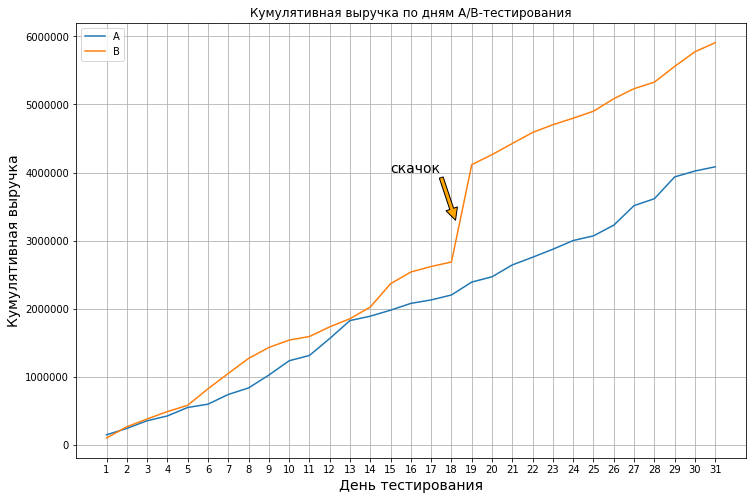

In [56]:
fig = plt.figure(figsize=(12, 8))
plt.plot(cumulative_revenue_a['test_day'],
         cumulative_revenue_a['revenue'],
         label='A')

plt.plot(cumulative_revenue_b['test_day'],
         cumulative_revenue_b['revenue'],
         label='B')
plt.title('Кумулятивная выручка по дням A/B-тестирования')
plt.xlabel('День тестирования', fontsize='14')
plt.ylabel('Кумулятивная выручка', fontsize='14')
plt.xticks([x for x in range(1, 32)])
plt.annotate('скачок',
             xy=(18.2, 3300000),
             xytext=(15, 4000000),
             arrowprops=dict(facecolor='orange'),
             fontsize='14')
plt.grid(True)
plt.legend()
plt.show()

**ВЫВОД**

Группа `B` на всём протяжении тестирования имеет большую кумулятивную выручку, чем группа `A`. При этом на наблюдается скачок кумулятивной выручки на 19 день тестирования для группы `B`. Возможно, он обусловлен аномально большой покупкой.

#### Расчёт кумулятивного среднего чека по группам

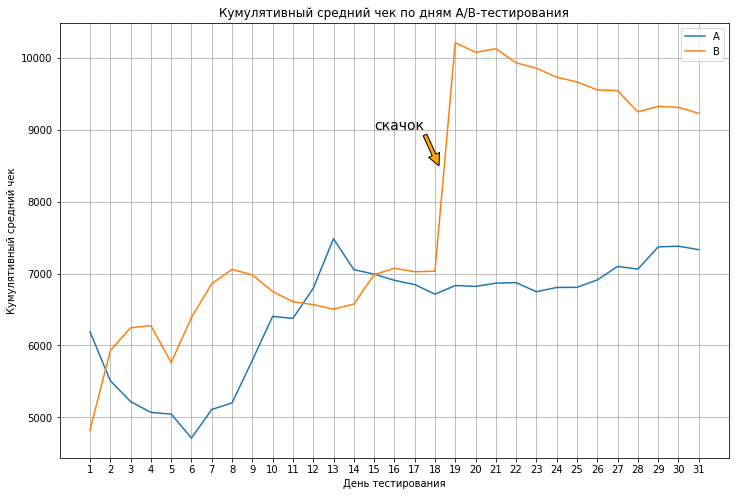

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.plot(cumulative_revenue_a['test_day'],
        cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
        label='A')

plt.plot(cumulative_revenue_b['test_day'],
        cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'],
        label='B')
plt.title('Кумулятивный средний чек по дням A/B-тестирования')
plt.xlabel('День тестирования')
plt.ylabel('Кумулятивный средний чек')
plt.xticks([x for x in range(1, 32)])
plt.annotate('скачок',
             xy=(18.2, 8500),
             xytext=(15, 9000),
             arrowprops=dict(facecolor='orange'),
             fontsize='14')
plt.grid(True)
plt.legend()
plt.show()

**ВЫВОД**

Группа `B` в целом имеет больший кумулятивный средний чек, чем группа `A`. При этом на наблюдается скачок кумулятивного среднего чека на 19 день тестирования для группы `B`. В данный день средний чек резко увеличился - была совершена аномально большая покупка.

#### Расчёт отношения кумулятивного среднего чека группы `B` к группе `A`

In [16]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b,
                                                       on='test_day',
                                                       suffixes=('_a', '_b'))

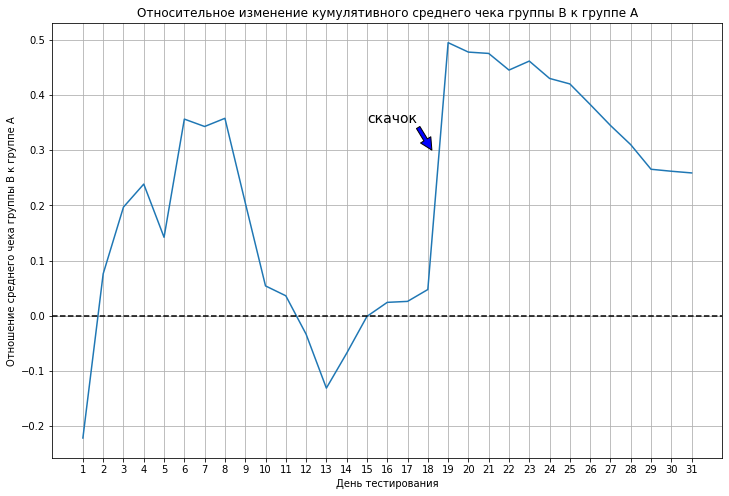

In [57]:
fig = plt.figure(figsize=(12, 8))
plt.plot(merged_cumulative_revenue['test_day'],
         merged_cumulative_revenue['revenue_b']
         / merged_cumulative_revenue['orders_b']
         / merged_cumulative_revenue['revenue_a']
         * merged_cumulative_revenue['orders_a']
         - 1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')
plt.xlabel('День тестирования')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xticks([x for x in range(1, 32)])
plt.grid(True)
plt.axhline(y=0,
            color='black',
            linestyle='--')
plt.annotate('скачок',
             xy=(18.2, 0.3),
             xytext=(15, 0.35),
             arrowprops=dict(facecolor='blue'),
             fontsize='14')
plt.show()

**Вывод**

Относительное изменение среднего чека группы `B` к группе `A` не противоречит ранее высказанным предположениям: средний чек группы `B` выше, чем средний чек группа `A`. Также можно отметить скачки, вызванные выбросами.

#### Расчёт кумулятивной конверсии по группам

In [18]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [19]:
cumulative_conversion_a = cumulative_data.query('group == "A"')[['test_day',
                                                             'orders',
                                                             'conversion']]

cumulative_conversion_b = cumulative_data.query('group == "B"')[['test_day',
                                                             'orders',
                                                             'conversion']]

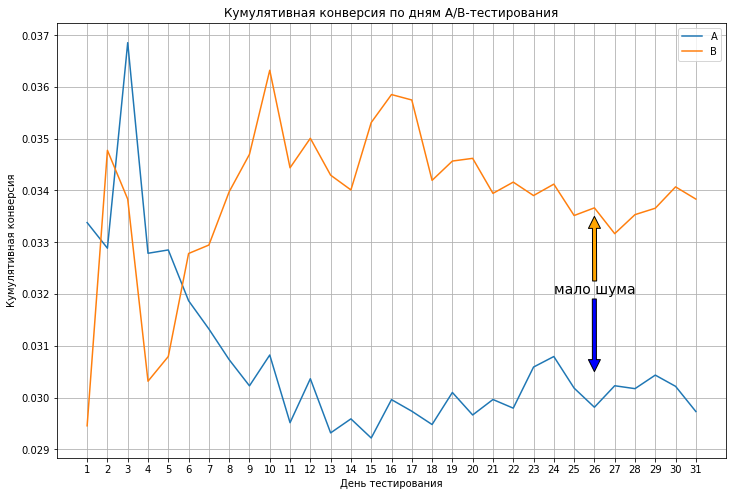

In [60]:
fig = plt.figure(figsize=(12, 8))
plt.plot(cumulative_conversion_a['test_day'],
         cumulative_conversion_a['conversion'],
         label='A')

plt.plot(cumulative_conversion_b['test_day'],
         cumulative_conversion_b['conversion'],
         label='B')
plt.title('Кумулятивная конверсия по дням A/B-тестирования')
plt.xlabel('День тестирования')
plt.ylabel('Кумулятивная конверсия')
plt.xticks([x for x in range(1, 32)])
plt.grid(True)
plt.annotate('мало шума',
             xy=(26, 0.0335),
             xytext=(24, 0.032),
             arrowprops=dict(facecolor='orange'),
             fontsize='14')
plt.annotate('         ',
             xy=(26, 0.0305),
             xytext=(24, 0.032),
             arrowprops=dict(facecolor='blue'),
             fontsize='14')
plt.legend()
plt.show()

**Вывод**

В течение первых 10 дней тестирования наблюдается шум, который значительно снижается к 20-му дню. В целом кумулятивная конверсия для группы `B` выше чем для группы `A`.

#### Расчёт отношения кумулятивной конверсии группы `B` к группе `A`

In [21]:
merged_cumulative_conversion = cumulative_conversion_a.merge(cumulative_conversion_b,
                                                             on='test_day',
                                                             suffixes=('_a', '_b'))

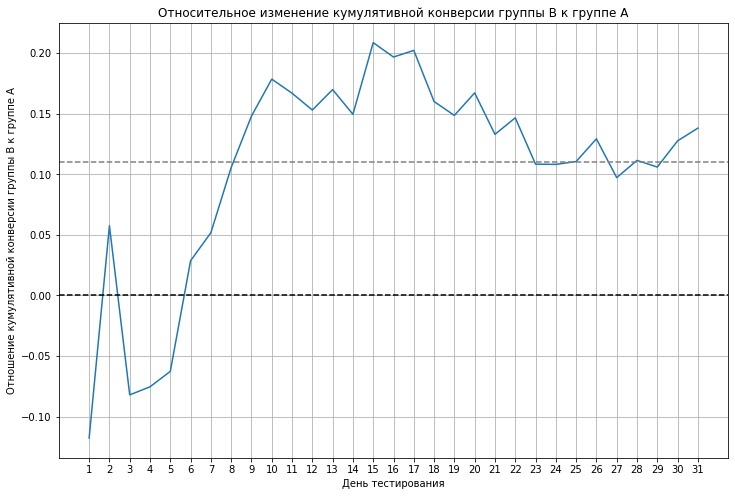

In [22]:
fig = plt.figure(figsize=(12, 8))
plt.plot(merged_cumulative_conversion['test_day'],
         merged_cumulative_conversion['conversion_b']
         / merged_cumulative_conversion['conversion_a']
         - 1)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе А')
plt.xlabel('День тестирования')
plt.ylabel('Отношение кумулятивной конверсии группы B к группе A')
plt.xticks([x for x in range(1, 32)])
plt.grid(True)
plt.axhline(y=0,
            color='black',
            linestyle='--')
plt.axhline(y=0.11,
            color='grey',
            linestyle='--')
plt.show()

**Вывод**

Стабилизировавшееся к 20 дню изменение отношения кумулятивной конверсии показывает приблизительное 11% преимущество группы `B` относительно группы `A`.

### Поиск выбросов

#### Поиск выбросов по количеству заказов

In [23]:
orders_by_buyers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_by_buyers.columns = ['visitor_id', 'orders']

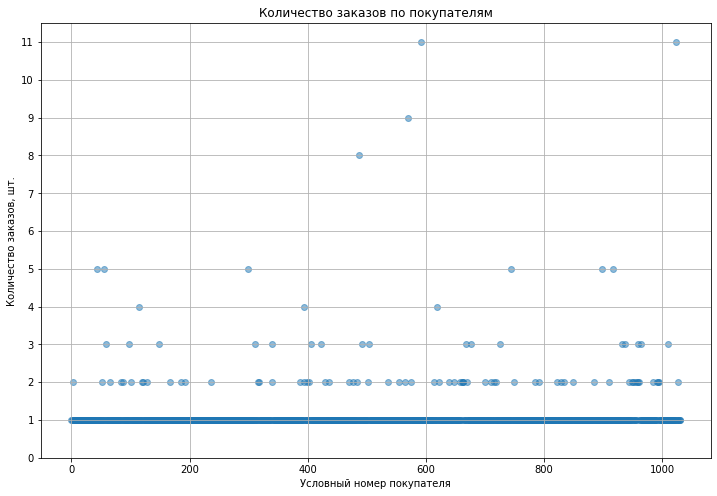

In [24]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(orders_by_buyers.index, orders_by_buyers['orders'], alpha=0.5)
plt.title('Количество заказов по покупателям')
plt.xlabel('Условный номер покупателя')
plt.ylabel('Количество заказов, шт.')
plt.yticks([x for x in range(12)])
plt.grid(True)
plt.show()

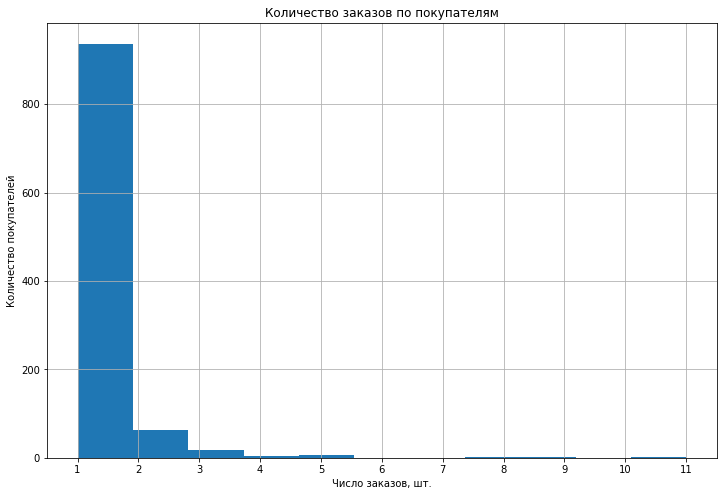

In [25]:
fig = plt.figure(figsize=(12, 8))
plt.hist(orders_by_buyers['orders'], bins=11, range=(1, 11))
plt.xticks([x for x in range(1, 12)])
plt.title('Количество заказов по покупателям')
plt.xlabel('Число заказов, шт.')
plt.ylabel('Количество покупателей')
plt.grid(True)
plt.show()

**Промежуточный вывод**

По результатам анализа графиков очевидно, что большинство покупателей совершают по одному заказу, лишь небольшое число делает 2 или 3 заказа. В отдельных случаях число заказов доходит до 11. Очевидно, что данные отдельные случаи являются выбросами.

In [26]:
print('Распределение покупателей от числа покупок по 90, 95 и 99 перцентилям')
print(np.percentile(orders_by_buyers['orders'], [90, 95, 99]))

Распределение покупателей от числа покупок по 90, 95 и 99 перцентилям
[1. 2. 4.]


**Промежуточный вывод**

95% покупателей совершают не более 2 покупок, 99% покупателей совершают не более 4 покупок. За верхнюю границу для фильтрации выбросов необходимо выбрать 2 покупки.

#### Поиск выбросов по количеству заказов

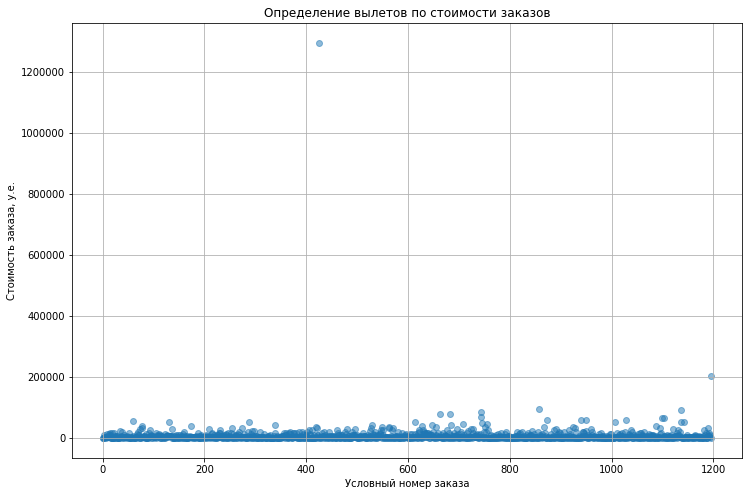

In [27]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(orders.index, orders['revenue'], alpha=0.5)
plt.title('Определение вылетов по стоимости заказов')
plt.xlabel('Условный номер заказа')
plt.ylabel('Стоимость заказа, у.е.')
plt.grid(True)
plt.show()

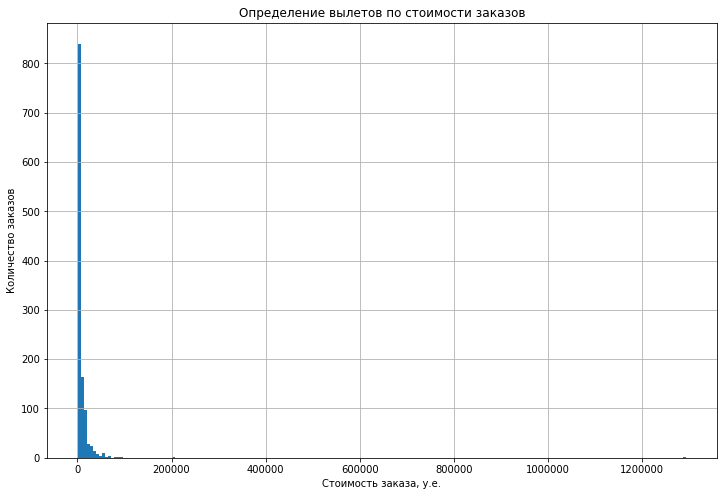

In [28]:
fig = plt.figure(figsize=(12, 8))
plt.hist(orders['revenue'], bins=200)
plt.title('Определение вылетов по стоимости заказов')
plt.xlabel('Стоимость заказа, у.е.')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

**Промежуточный вывод**

Очевидно, что попадаются покупатели с очень крупными заказами, но таких немного. Эти покупатили могут оказывать значительное влияние на результаты анализа и их данные необходимо отнести к выбросам.

In [29]:
print('Распределение покупателей от объёма выручки по 90, 95 и 99 перцентилям')
print(np.percentile(orders['revenue'], [90, 95, 99]))

Распределение покупателей от объёма выручки по 90, 95 и 99 перцентилям
[18168.  28000.  58233.2]


**Промежуточный вывод**

95% покупателей совершают покупки на сумму не более 28000 у.е., 1% превосходит порог в 58233,2 у.е. В качестве верхнего порогового значения примем 28000 у.е.

**Вывод**:

Для фильтрации данных в дальнейшем будут применены следующие критерии:
* число покупок не более 2
* стоимость одной покупки не более 28 тыс. у.е.

In [53]:
# функция для проверки по критерию Уикоксона-Манна-Уитни
def mannwhitneyu_check(alpha, h_0, h_alt, samp_a, samp_b):
    print(f'alpha: {alpha:.3f}')
    print(f'p-значение: {stats.mannwhitneyu(samp_a, samp_b, alternative="less")[1]:.3f}')
    if stats.mannwhitneyu(samp_a, samp_b)[1] < alpha:
        print(f'Отвергаем нулевую гипотезу "{h_0}", в пользу альтернативной гипотезы "{h_alt}".')
    else:
        print(f'Не удалось отвергнуть нулевую гипотезу "{h_0}".')
    
        
mannwhitneyu_check(0.05,
                   'Отсутствие статистически значимой разницы между конверсиями для групп A и B',
                   'Группа B показывает лучшую конверсию, чем группа A',
                   sample_a,
                   sample_b)    

print(f'Различие в средней конверсии: {sample_b.mean()/sample_a.mean()-1:.3f}')

alpha: 0.050
p-значение: 0.008
Отвергаем нулевую гипотезу "Отсутствие статистически значимой разницы между конверсиями для групп A и B", в пользу альтернативной гипотезы "Группа B показывает лучшую конверсию, чем группа A".
Различие в средней конверсии: 0.138


**Вывод**

* Наблюдается значимая разница между конверсиями между группами `A` и `B` по "сырым данным" в пользу группы `B` (на 13,8 %).
* Тест Уилкоксона-Манна-Уитни позволяет отвергнуть гипотезу о том, что наблюдаемая разница не является статистически значимой, в пользу альтернативной гипотезы "Группа B показывает лучшую конверсию, чем группа A".

#### Оценка статистической значимости различий в средних чеках между группами по «сырым» данным

Проверим группы `A` и `B` на наличие статистически значимых различий по среднему чеку помощью теста Уилкоксона-Манна-Уитни.
В качестве нулевой гипотезы примем "Отсутствие статистически значимой разницы между средними чеками для групп `A` и `B`". Альтернативная гипотеза: "Группа `B` показывает лучший средний чек, чем группа `A`", таким образом нам понадобится односторонняя проверка гипотезы. В качестве значения альфа примем 0,05.

In [47]:
mannwhitneyu_check(0.05,
                   'Отсутствие статистически значимой разницы между средними чеками для групп A и B',
                   'Группа B показывает лучший средний чек, чем группа A',
                   orders.query('group == "A"')['revenue'],
                   orders.query('group == "B"')['revenue'])

print(f'Различие в среднем чеке: \
{orders[orders["group"] == "B"]["revenue"].mean()/orders[orders["group"] == "A"]["revenue"].mean()-1:.3f}')

alpha: 0.050
p-значение: 0.365
Не удалось отвергнуть нулевую гипотезу "Отсутствие статистически значимой разницы между средними чеками для групп A и B".
Различие в среднем чеке: 0.259


**Вывод**

Несмотря на то, что наблюдается разница между средними чеками для групп `A` и `B` по "сырым данным" в пользу группы `B` на 25,9%, тест Уилкоксона-Манна-Уитни не позволяет нам отбросить гипотезу об отсутствие статистически значимой разницы между группами.

### Подготовка очищенных данных

In [48]:
visitors_whith_expensive_orders = orders.query('revenue > 28000')['visitor_id']
visitors_whith_many_orders = (orders.groupby('visitor_id', as_index=False)
                           .agg({'transaction_id': 'nunique'})
                           .query('transaction_id > 2')['visitor_id'])
abnormal_visitors = pd.concat([visitors_whith_expensive_orders, visitors_whith_many_orders], axis=0).drop_duplicates()

In [49]:
sample_a_filtered = sample_maker(visitors,
                                 orders[~orders['visitor_id'].isin(abnormal_visitors)],
                                 'A')
sample_b_filtered = sample_maker(visitors,
                                 orders[~orders['visitor_id'].isin(abnormal_visitors)],
                                 'B')

### Оценка статистической значимости различий по "очищенным данным"

#### Оценка статистической значимости различий в конверсии между группами по «очищенным» данным

In [50]:
mannwhitneyu_check(0.05,
                   'Отсутствие статистически значимой разницы между конверсиями для групп A и B',
                   'Группа B показывает лучшую конверсию, чем группа A',
                   sample_a_filtered,
                   sample_b_filtered)    

print(f'Различие в средней конверсии: {sample_b_filtered.mean()/sample_a_filtered.mean()-1:.3f}')

alpha: 0.050
p-значение: 0.006
Отвергаем нулевую гипотезу "Отсутствие статистически значимой разницы между конверсиями для групп A и B", принимает альтернативную гипотезу "Группа B показывает лучшую конверсию, чем группа A".
Различие в средней конверсии: 0.176


**Вывод**

* Проведение анализа на "очищенных" данных подтвердило предыдущие выводы.
* Наблюдается значимая разница между конверсиями между группами `A` и `B` по "сырым данным" в пользу группы `B` на 17,6 % (по "сырым" данным было 13,8 %).
* Тест Уилкоксона-Манна-Уитни позволяет отвергнуть гипотезу о том, что наблюдаемая разница не является статистически значимой (p значение уменьшилось с 0,008 до 0,006), в пользу альтернативной гипотезы "Группа B показывает лучшую конверсию, чем группа A".

#### Оценка статистической значимости различий в средних чеках между группами по «очищенным» данным

In [55]:
mannwhitneyu_check(0.05,
                   'Отсутствие статистически значимой разницы между средними чеками для групп A и B',
                   'Группа B показывает лучший средний чек, чем группа A',
                   orders[(~orders['visitor_id'].isin(abnormal_visitors))
                          & (orders['group'] == "A")]['revenue'],
                   orders[(~orders['visitor_id'].isin(abnormal_visitors))
                          & (orders['group'] == "B")]['revenue'])

average_check_a = orders[(~orders['visitor_id'].isin(abnormal_visitors)) & (orders['group'] == "A")]['revenue'].mean()
average_check_b = orders[(~orders['visitor_id'].isin(abnormal_visitors)) & (orders['group'] == "B")]['revenue'].mean()

print(f'Различие в среднем чеке: {average_check_a/average_check_b-1:.3f}')

alpha: 0.050
p-значение: 0.624
Не удалось отвергнуть нулевую гипотезу "Отсутствие статистически значимой разницы между средними чеками для групп A и B".
Различие в среднем чеке: 0.023


**Вывод**

* Анализ по "очищенным" данным ставит всё на свои места.
* Ранее наблюдаемая разница в средних чеках сократилась с 25,9% до 2,3 %.
* Тест Уилкоксона-Манна-Уитни не позволяет нам отбросить гипотезу об отсутствии статистически значимой разницы между группами.

### Кумулятивные данные ("чистые")

#### Расчёт кумулятивной выручки по группам на основе "очищенных" данных

In [36]:
cumulative_data = cumulative_data_maker(orders[~orders['visitor_id'].isin(abnormal_visitors)],
                                        visitors)

In [37]:
cumulative_revenue_a = cumulative_data.query('group == "A"')[['test_day',
                                                             'orders',
                                                             'revenue']]

cumulative_revenue_b = cumulative_data.query('group == "B"')[['test_day',
                                                             'orders',
                                                             'revenue']]

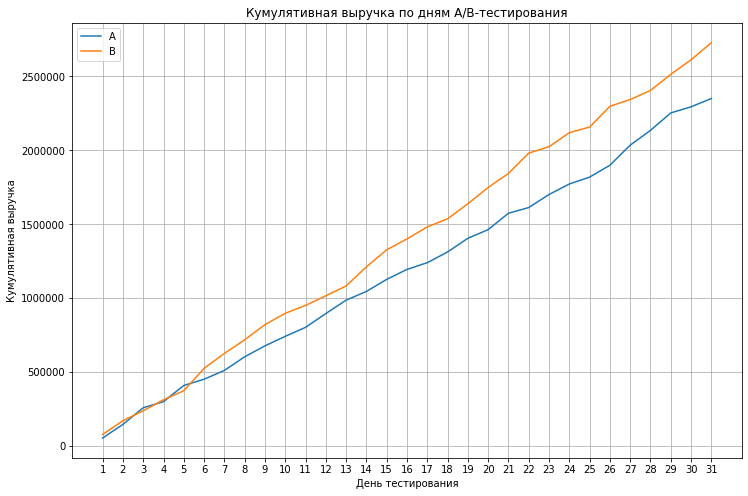

In [38]:
fig = plt.figure(figsize=(12, 8))
plt.plot(cumulative_revenue_a['test_day'],
         cumulative_revenue_a['revenue'],
         label='A')

plt.plot(cumulative_revenue_b['test_day'],
         cumulative_revenue_b['revenue'],
         label='B')
plt.title('Кумулятивная выручка по дням A/B-тестирования')
plt.xlabel('День тестирования')
plt.ylabel('Кумулятивная выручка')
plt.xticks([x for x in range(1, 32)])
plt.grid(True)
plt.legend()
plt.show()

**ВЫВОД**

"Очищенные" данные показывают, что группа `B` на всём протяжении тестирования имеет большую кумулятивную выручку, чем группа `A`. Ранее наблюдаемые скачки отсутствуют.

#### Расчёт кумулятивного среднего чека по группам на основе "очищенных" данных

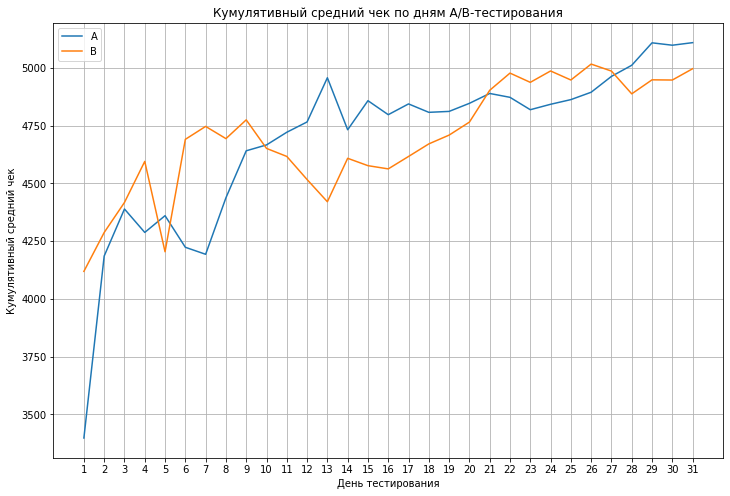

In [39]:
fig = plt.figure(figsize=(12, 8))
plt.plot(cumulative_revenue_a['test_day'],
        cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
        label='A')

plt.plot(cumulative_revenue_b['test_day'],
        cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'],
        label='B')
plt.title('Кумулятивный средний чек по дням A/B-тестирования')
plt.xlabel('День тестирования')
plt.ylabel('Кумулятивный средний чек')
plt.xticks([x for x in range(1, 32)])
plt.grid(True)
plt.legend()
plt.show()

**ВЫВОД**

На "очищенных" трудно сделать вывод какая из двух групп имеет больший средний чек.

#### Расчёт отношения кумулятивного среднего чека группы `B` к группе `A` на основе "очищенных" данных

In [40]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b,
                                                       on='test_day',
                                                       suffixes=('_a', '_b'))

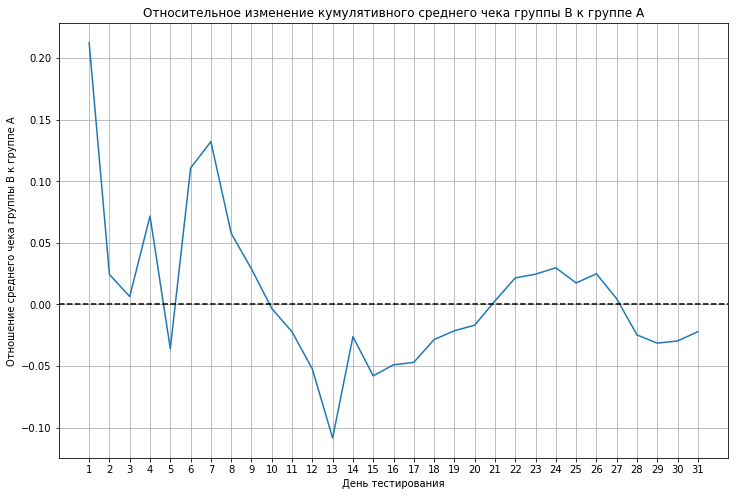

In [41]:
fig = plt.figure(figsize=(12, 8))
plt.plot(merged_cumulative_revenue['test_day'],
         merged_cumulative_revenue['revenue_b']
         / merged_cumulative_revenue['orders_b']
         / merged_cumulative_revenue['revenue_a']
         * merged_cumulative_revenue['orders_a']
         - 1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')
plt.xlabel('День тестирования')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xticks([x for x in range(1, 32)])
plt.grid(True)
plt.axhline(y=0,
            color='black',
            linestyle='--')
plt.show()

**Вывод**

Относительное изменение среднего чека группы `B` к группе `A` также не демонстрирует преимущество одной группы над другой.

#### Расчёт кумулятивной конверсии по группам на основе "очищенных" данных

In [42]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [43]:
cumulative_conversion_a = cumulative_data.query('group == "A"')[['test_day',
                                                             'orders',
                                                             'conversion']]

cumulative_conversion_b = cumulative_data.query('group == "B"')[['test_day',
                                                             'orders',
                                                             'conversion']]

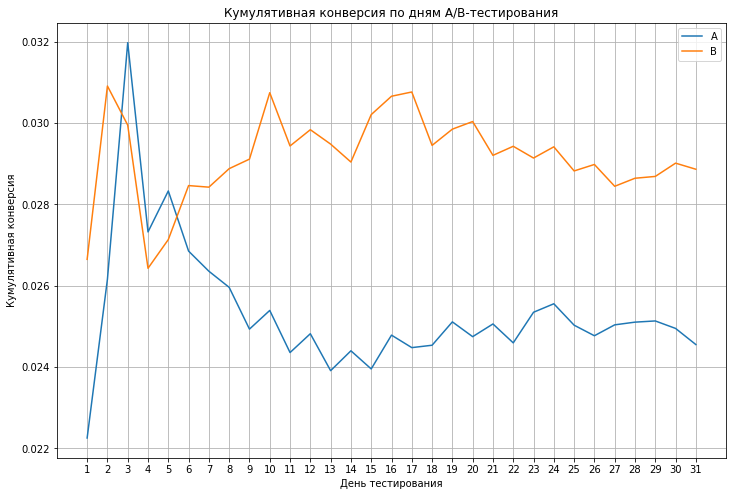

In [44]:
fig = plt.figure(figsize=(12, 8))
plt.plot(cumulative_conversion_a['test_day'],
         cumulative_conversion_a['conversion'],
         label='A')

plt.plot(cumulative_conversion_b['test_day'],
         cumulative_conversion_b['conversion'],
         label='B')
plt.title('Кумулятивная конверсия по дням A/B-тестирования')
plt.xlabel('День тестирования')
plt.ylabel('Кумулятивная конверсия')
plt.xticks([x for x in range(1, 32)])
plt.grid(True)
plt.legend()
plt.show()

**Вывод**

"Очищенные" данные несильно повлияли на график кумулятивной конверсии. Предыдущие выводы справедливы: В течение первых 10 дней тестирования наблюдается шум, который значительно снижается к 20-му дню. В целом кумулятивная конверсия для группы `B` выше чем для группы `A`.

#### Расчёт отношения кумулятивной конверсии группы `B` к группе `A`  на основе "очищенных" данных

In [45]:
merged_cumulative_conversion = cumulative_conversion_a.merge(cumulative_conversion_b,
                                                             on='test_day',
                                                             suffixes=('_a', '_b'))

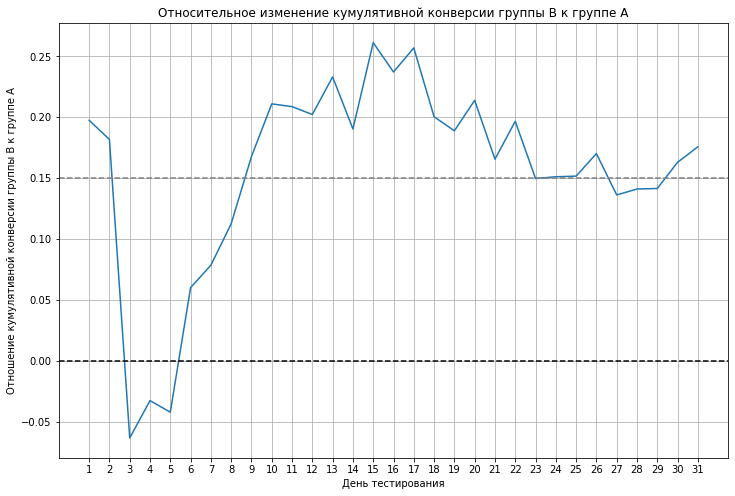

In [46]:
fig = plt.figure(figsize=(12, 8))
plt.plot(merged_cumulative_conversion['test_day'],
         merged_cumulative_conversion['conversion_b']
         / merged_cumulative_conversion['conversion_a']
         - 1)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе А')
plt.xlabel('День тестирования')
plt.ylabel('Отношение кумулятивной конверсии группы B к группе A')
plt.xticks([x for x in range(1, 32)])
plt.grid(True)
plt.axhline(y=0,
            color='black',
            linestyle='--')
plt.axhline(y=0.15,
            color='grey',
            linestyle='--')
plt.show()

**Вывод**

На "очищенных" данных стабилизировавшееся к 20 дню изменение отношения кумулятивной конверсии показывает приблизительное 15% (ранее было 11%) преимущество группы `B` относительно группы `A`.

### Выводы по A/B тесту

1. В рамках анализа A/B теста оценивались такие параметры, как конверсия, выручка и средний чек.
2. Для конверсии была принята альтернативная гипотеза о наличии статистически значимого различия по конверсии между двумя группами как по "сырым", так и по "очищенным" данным. По "очищенным" данным средняя конверсия группы `B` лучше группы `A`на 17.6 %, кумулятивная конверсия группы `B` лучше на 15 %.
3. По среднему чеку не получилось отвергнуть нулевую гипотезу об отстуствии статистически значимого различия между средними чеками по группам. По "очищенным" данным средний чек группы `B` лучше группы `A` всего лишь на 2.3%.
4. Не противоречит выводам 2 и 3 выявленное на основе анализа кумулятивных данных преимущество группы `B` по кумулятивной выручке относительно группы `A`.
5. Графики по кумулятивным данным показывают, что начиная с 20 дня теста каких-то изменений в поведении метрик не наблюдается.
6. На основании вышесказанного предлагается зафиксировать победу группы `B`, показавшей лучшую конверсию при прочих равных, и остановить A/B-тест.

## Общие выводы

В рамках проекта:
1. Выполнена приоритизация списка из 9 гипотез на основе фреймворков ICE и RICE. Фреймворки показали различные результаты, наиболее высоко оценённой оказалась 7-я гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
2. При подготовке A/B теста были допущены ошибки, и 5.6% покупателей попали как в группу A, так и в группу B.
3. Проведен анализ A/B теста. По результатам анализа предлагается зафиксировать победу группы `B`, показавшей лучшую конверсию при том же среднем чеке, и остановить A/B-тест. Масштабирование мероприятий группы `B` позволит увеличить выручку в целом по продукту.